In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 40

# Specify each path

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([ 500, 1046,  546,  521,  550,  490,  459,  381,  590], dtype=int64))


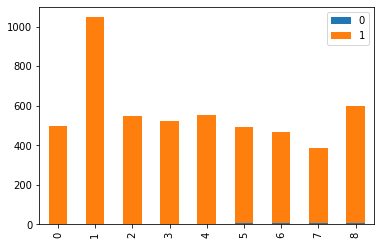

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 144       
Total params: 1,319
Trainable params: 1,319
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/30 [==============================] - 1s 6ms/step - loss: 2.1680 - accuracy: 0.1382 - val_loss: 2.0491 - val_accuracy: 0.3068

Epoch 00001: saving model to model\keypoint_classifier.hdf5
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.9961 - accuracy: 0.2699 - val_loss: 1.8629 - val_accuracy: 0.3171

Epoch 00002: saving model to model\keypoint_classifier.hdf5
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.8297 - accuracy: 0.3437 - val_loss: 1.6348 - val_accuracy: 0.4288

Epoch 00003: saving model to model\keypoint_classifier.hdf5
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.6484 - accuracy: 0.3903 - val_loss: 1.4284 - val_accuracy: 0.5161

Epoch 00004: saving model to model\keypoint_classifier.hdf5
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 1.4724 - accuracy: 0.4360 - val_loss: 1.2679 - val_accuracy: 0.4870

Epoch 00005: saving model to model\keypoint_c

30/30 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7757 - val_loss: 0.2264 - val_accuracy: 0.9890

Epoch 00041: saving model to model\keypoint_classifier.hdf5
Epoch 42/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.5743 - accuracy: 0.7867 - val_loss: 0.2152 - val_accuracy: 0.9882

Epoch 00042: saving model to model\keypoint_classifier.hdf5
Epoch 43/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.7833 - val_loss: 0.2113 - val_accuracy: 0.9890

Epoch 00043: saving model to model\keypoint_classifier.hdf5
Epoch 44/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7886 - val_loss: 0.2008 - val_accuracy: 0.9890

Epoch 00044: saving model to model\keypoint_classifier.hdf5
Epoch 45/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5456 - accuracy: 0.7917 - val_loss: 0.2077 - val_accuracy: 0.9882

Epoch 00045: saving model to model\keypoint_classifier

30/30 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8460 - val_loss: 0.1553 - val_accuracy: 0.9614

Epoch 00121: saving model to model\keypoint_classifier.hdf5
Epoch 122/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8576 - val_loss: 0.1603 - val_accuracy: 0.9630

Epoch 00122: saving model to model\keypoint_classifier.hdf5
Epoch 123/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8549 - val_loss: 0.1528 - val_accuracy: 0.9630

Epoch 00123: saving model to model\keypoint_classifier.hdf5
Epoch 124/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8423 - val_loss: 0.1614 - val_accuracy: 0.9630

Epoch 00124: saving model to model\keypoint_classifier.hdf5
Epoch 125/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8578 - val_loss: 0.1687 - val_accuracy: 0.9559

Epoch 00125: saving model to model\keypoint_classi

30/30 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8644 - val_loss: 0.1483 - val_accuracy: 0.9701

Epoch 00161: saving model to model\keypoint_classifier.hdf5
Epoch 162/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8665 - val_loss: 0.1584 - val_accuracy: 0.9583

Epoch 00162: saving model to model\keypoint_classifier.hdf5
Epoch 163/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8565 - val_loss: 0.1624 - val_accuracy: 0.9583

Epoch 00163: saving model to model\keypoint_classifier.hdf5
Epoch 164/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8534 - val_loss: 0.1618 - val_accuracy: 0.9717

Epoch 00164: saving model to model\keypoint_classifier.hdf5
Epoch 165/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8657 - val_loss: 0.1475 - val_accuracy: 0.9709

Epoch 00165: saving model to model\keypoint_classi

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9630


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.7183343e-10 9.9455392e-01 7.2983346e-07 3.3451772e-05 3.2947611e-10
 4.0484272e-04 3.9468950e-06 1.3355216e-07 5.0029964e-03]
1


# Confusion matrix

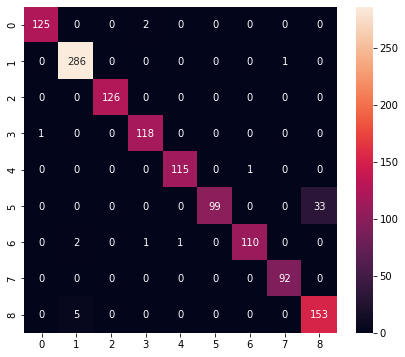

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       127
           1       0.98      1.00      0.99       287
           2       1.00      1.00      1.00       126
           3       0.98      0.99      0.98       119
           4       0.99      0.99      0.99       116
           5       1.00      0.75      0.86       132
           6       0.99      0.96      0.98       114
           7       0.99      1.00      0.99        92
           8       0.82      0.97      0.89       158

    accuracy                           0.96      1271
   macro avg       0.97      0.96      0.96      1271
weighted avg       0.97      0.96      0.96      1271



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpoz_dwz2o\assets


7168

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.7183337e-10 9.9455392e-01 7.2983278e-07 3.3451735e-05 3.2947484e-10
 4.0484249e-04 3.9468946e-06 1.3355177e-07 5.0029824e-03]
1
